In [1]:
import cv2
import numpy as np 
from scipy.interpolate import interp1d
from pyefd import elliptic_fourier_descriptors
from matplotlib import pyplot as plt


%matplotlib inline

In [3]:
img = cv2.imread('potato_good_malformed/Fourier_Good/Afra_12_2_1_100_3.png', cv2.IMREAD_UNCHANGED)

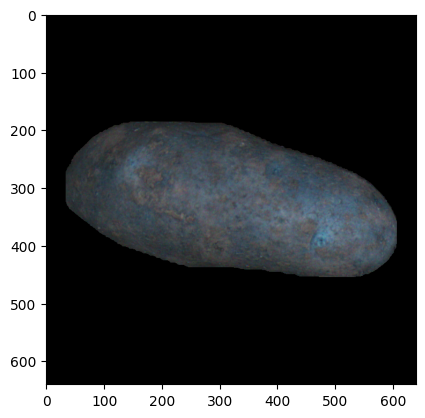

In [4]:
plt.imshow(img)
plt.show()

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

In [21]:
_, thresh = cv2.threshold(blur, 1, 255, cv2.THRESH_BINARY)

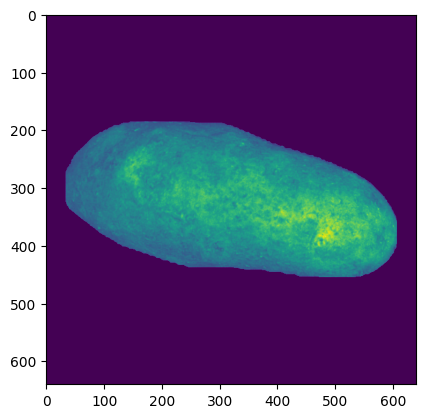

In [23]:
plt.imshow(gray)
plt.show()

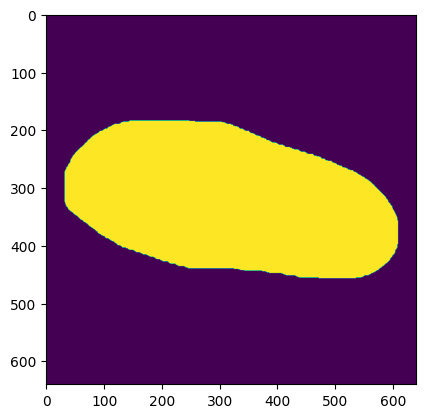

In [24]:
plt.imshow(thresh)
plt.show()

In [25]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [26]:
if not contours:
    print('No contours found')

In [27]:
coeffs = []

for cnt in contours:
    # Find the coefficients of the contours
    coeffs.append(elliptic_fourier_descriptors(np.squeeze(cnt, axis=1), order=10))

In [28]:
for coef in coeffs:
    print(coef)

[[-1.86993942e+02 -1.86504974e+02 -1.23444165e+02  7.05401728e+01]
 [ 3.20124895e+00  1.19207921e-01 -4.16253792e+00  5.24048847e+00]
 [ 1.04514318e+01 -1.74397703e+01 -1.43000286e+01 -1.15665596e+01]
 [-1.02409686e+00  5.64970420e-01  1.08222787e+00  3.38801494e+00]
 [ 3.30318766e+00  1.86166006e+00  1.46821299e+00 -4.99554482e+00]
 [-1.38116649e+00  9.65662087e-01  3.91720379e-01 -8.36887389e-01]
 [-5.38338012e-01  7.65167126e-01  7.29328065e-01 -2.22969663e-01]
 [-2.68687146e-01 -1.62837924e-01 -1.06658694e+00 -3.27533953e-01]
 [-1.65393641e-01 -3.55046291e-01 -1.16383906e-01  3.37433586e-01]
 [ 2.59506281e-01 -3.62351098e-01 -7.26692864e-01  2.81409648e-01]]


In [29]:
potato_contour = max(contours, key=cv2.contourArea)

In [30]:
potato_contour

array([[[145, 184]],

       [[144, 185]],

       [[143, 185]],

       ...,

       [[148, 184]],

       [[147, 184]],

       [[146, 184]]], dtype=int32)

In [31]:
M = cv2.moments(potato_contour)

In [32]:
M

{'m00': 117640.0,
 'm10': 37153173.83333333,
 'm01': 38058244.166666664,
 'm20': 14334747222.166666,
 'm11': 12447726056.916666,
 'm02': 12855882581.833332,
 'm30': 6192278131634.851,
 'm21': 4922496707986.4,
 'm12': 4337188385797.6997,
 'm03': 4507863705722.95,
 'mu20': 2600997427.1149445,
 'mu11': 428136110.3371792,
 'mu02': 543489271.312954,
 'mu30': 22166141653.902344,
 'mu21': 14569638009.90857,
 'mu12': 15165878.161010742,
 'mu03': -2853848311.34375,
 'nu20': 0.1879446167864685,
 'nu11': 0.030936546246039157,
 'nu02': 0.039271812328461816,
 'nu30': 0.00466984606301441,
 'nu21': 0.0030694546557740038,
 'nu12': 3.1950673927902097e-06,
 'nu03': -0.0006012337424011143}

In [33]:
if M['m00'] == 0:
    print('No contours found')

In [34]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [35]:
potato_contour = potato_contour.squeeze()

In [36]:
potato_contour

array([[145, 184],
       [144, 185],
       [143, 185],
       ...,
       [148, 184],
       [147, 184],
       [146, 184]], dtype=int32)

In [37]:
distances = np.sqrt((potato_contour[:, 0] - cx)**2 + (potato_contour[:, 1] - cy)**2)

In [38]:
distances

array([219.59280498, 219.73848093, 220.517573  , ..., 217.27862297,
       218.04815982, 218.81956037])

In [39]:
x_old = np.linspace(0, 1, len(distances))

In [40]:
f = interp1d(x_old, distances, kind='linear')

In [42]:
x_new = np.linspace(0, 1, 256)

In [43]:
distances_interpolated = f(x_new)

In [44]:
# Normalize the interpolated distances so that the maximum distance is 250
max_distance = np.max(distances_interpolated)

In [45]:
distances_normalized = distances_interpolated / max_distance * 250

In [46]:
dft_result = np.fft.fft(distances_normalized)

In [47]:
dft_magnitude = np.abs(dft_result)

In [48]:
dft_magnitude

array([4.28806864e+04, 4.06400381e+02, 8.92438191e+03, 5.57324570e+02,
       6.19558360e+02, 1.54123849e+02, 2.04902343e+02, 1.79877840e+02,
       6.17545239e+01, 7.08132876e+01, 4.78192106e+01, 5.80505240e+01,
       5.58362392e+01, 3.47990965e+01, 5.90999990e+01, 1.78481106e+01,
       4.19524536e+01, 2.43663209e+01, 4.54493052e+01, 2.79023089e+01,
       3.07667636e+01, 1.26737301e+01, 1.44619404e+01, 1.39862565e+01,
       9.59847308e+00, 2.53675907e+01, 1.05236788e+01, 4.79555387e+00,
       1.56450474e+01, 1.63794287e+01, 6.41949015e+00, 6.93754735e+00,
       7.72876279e+00, 1.51023842e+01, 5.37177350e+00, 6.00677817e+00,
       9.78037578e+00, 3.67233060e+00, 1.18393025e+01, 6.02535484e+00,
       8.27930236e+00, 1.55833475e+01, 4.87374243e+00, 3.00589887e+00,
       3.07909829e+00, 7.80230427e+00, 1.07307741e+01, 8.57114550e+00,
       1.92377763e+00, 4.77406466e+00, 1.11082570e+01, 3.58984538e+00,
       5.58442290e+00, 5.23361096e+00, 5.88714376e+00, 4.78273349e+00,
      

In [49]:
dft_magnitude = np.abs(dft_result)

In [50]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

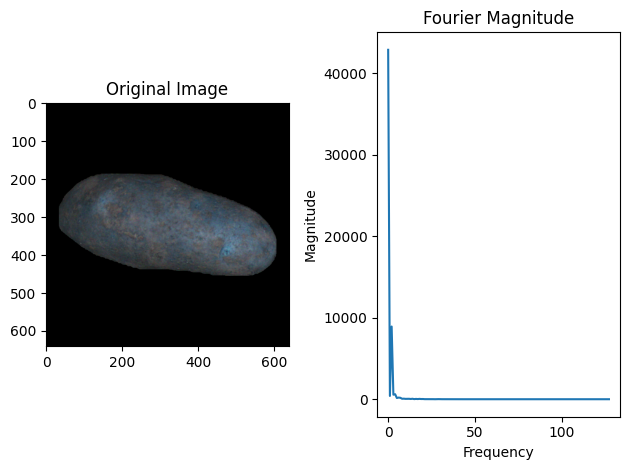

In [58]:
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(dft_magnitude[:256 // 2])  # Plot only half (symmetrical)
plt.title('Fourier Magnitude')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

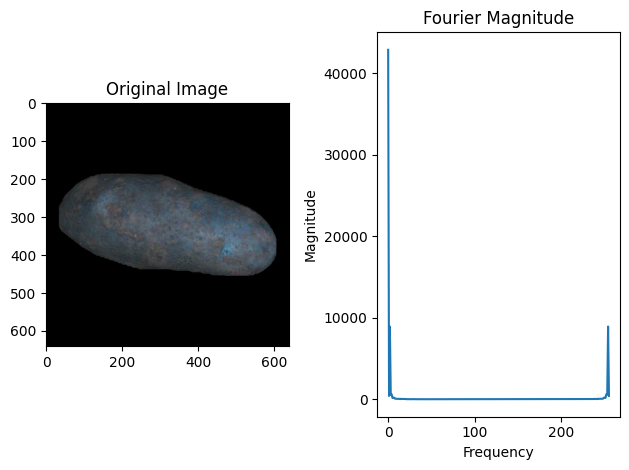

In [59]:
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(dft_magnitude[:256])  # Plot only half (symmetrical)
plt.title('Fourier Magnitude')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()